In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
import requests
from pathlib import Path
from datascience import *

In [2]:
spkrDir = Path('/Users/cun-yuwang/Desktop/csvs')
speakers = pd.read_csv(spkrDir/'allspeakers.csv')
spchDir = Path('/Users/cun-yuwang/Desktop/csvs')
speeches = pd.read_csv(spchDir/'allspeeches.csv')

# Number of Speeches Made

In [56]:
speech_count = speeches.groupby(['first_name', 'last_name', 'speaker_id']).count()
speech_count = speech_count[['Unnamed: 0']]
speech_count = speech_count.rename(index=str, columns={"Unnamed: 0": "Number of Speeches"})

In [58]:
speech_count.describe()

,Number of Speeches
count,460.000000
mean,69.726087
std,85.503424
min,1.000000
25%,18.000000
50%,45.500000
75%,89.250000
max,720.000000


In [59]:
name_num_speeches = speech_count.reset_index()

In [61]:
last_name = 'JAYAPAL'
first_name = 'Pramila'
#name_num_speeches[name_num_speeches['last_name'] == person]
name_num_speeches[(name_num_speeches['first_name'] == first_name) & (name_num_speeches['last_name'] == last_name)]

,first_name,last_name,speaker_id,Number of Speeches
347,Pramila,JAYAPAL,2354.0,124


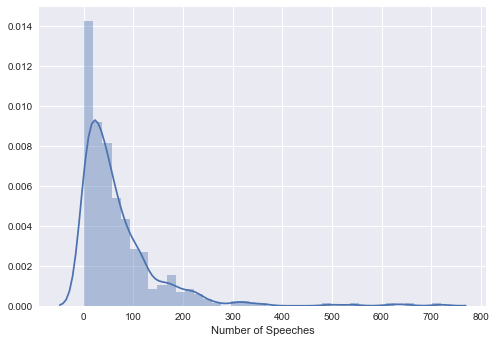

In [62]:
sns.distplot(name_num_speeches['Number of Speeches'])

# Word Count

### Total Words

In [63]:
total_words = speeches.groupby(['first_name', 'last_name']).sum().drop(
    ['Unnamed: 0', 'speech_id', 'speaker_id', 'year', 'day'], 1)

In [64]:
total_words.describe()

,word_count
count,459.000000
mean,32537.535948
std,58832.455195
min,11.000000
25%,5184.000000
50%,13129.000000
75%,32346.000000
max,615842.000000


In [65]:
total_words = total_words.reset_index()
last_name = 'JAYAPAL'
first_name = 'Pramila'
#name_num_speeches[name_num_speeches['last_name'] == person]
total_words[(total_words['first_name'] == first_name) & (total_words['last_name'] == last_name)]

,first_name,last_name,word_count
347,Pramila,JAYAPAL,52903


(0, 150000)

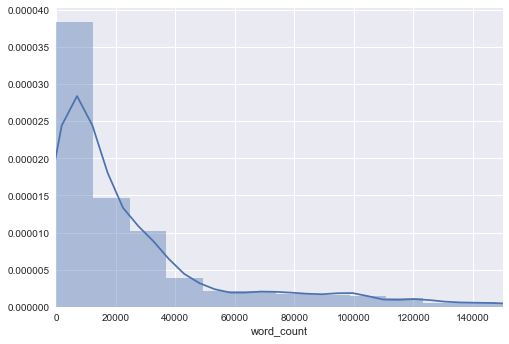

In [74]:
sns.distplot(total_words['word_count'])
plt.xlim(0, 150000)

# Change in activity over time

In [75]:
speeches

,Unnamed: 0,speech_id,last_name,topic_id,word_count,speech_text,file_name,mods_file,speaker_id,first_name,session_title,year,day,month
0,0,0,ABRAHAM,topic-id,35,"Mr.Speaker, I ask unanimous consent that my na...",CREC-2017-06-26-pt1-PgH5167-4.txt,CREC-2017-06-26-pt1-PgH5167-4.xml,2244.0,Ralph,REMOVAL OF NAME OF MEMBER AS COSPONSOR OF H.R. 60,2017.0,26.0,June
1,1,1,ABRAHAM,topic-id,151,"Mr.Speaker, I rise today to offer my support t...",CREC-2017-10-03-pt1-PgH7686-5.txt,CREC-2017-10-03-pt1-PgH7686-5.xml,2244.0,Ralph,PROTECTING THE UNBORN,2017.0,3.0,October
2,2,2,ABRAHAM,topic-id,327,"Mr.Speaker, I rise today to honor one of the h...",CREC-2018-02-26-pt1-PgH1229-4.txt,CREC-2018-02-26-pt1-PgH1229-4.xml,2244.0,Ralph,HONORING JOE QUATTRONE,2018.0,26.0,February
3,3,3,ABRAHAM,topic-id,6,"Mr.Speaker, I rise today to recognize",CREC-2017-06-26-pt1-PgH5141-6.txt,CREC-2017-06-26-pt1-PgH5141-6.xml,2244.0,Ralph,CONGRATULATING LAUREN EMERSON,2017.0,26.0,June
4,4,4,ABRAHAM,topic-id,42,"Mr.Speaker, I move that the House do now adjou...",CREC-2017-07-17-pt1-PgH5919-2.txt,CREC-2017-07-17-pt1-PgH5919-2.xml,2244.0,Ralph,ADJOURNMENT,2017.0,17.0,July
5,5,5,ABRAHAM,topic-id,2730,"Mr.Speaker, I am here to talk for a few minute...",CREC-2017-07-17-pt1-PgH5917.txt,CREC-2017-07-17-pt1-PgH5917.xml,2244.0,Ralph,2100,2017.0,17.0,July
6,6,6,ABRAHAM,topic-id,759,"Mr.Speaker, I rise today to recognize the exce...",CREC-2017-11-14-pt1-PgH9183.txt,CREC-2017-11-14-pt1-PgH9183.xml,2244.0,Ralph,THE CIVIL AIR PATROL'S PACE OF OPERATIONS IS E...,2017.0,14.0,November
7,7,7,ABRAHAM,topic-id,594,"Mr.Speaker, I rise today to bring attention to...",CREC-2017-07-17-pt1-PgH5888-2.txt,CREC-2017-07-17-pt1-PgH5888-2.xml,2244.0,Ralph,WHO HAS CONTROL OVER OUR SKIES,2017.0,17.0,July
8,8,8,ABRAHAM,topic-id,176,"Mr.Speaker, I rise today to honor the life of ...",CREC-2017-01-04-pt1-PgH57-2.txt,CREC-2017-01-04-pt1-PgH57-2.xml,2244.0,Ralph,HONORING THE LIFEOF CLYDE HOLLOWAY,2017.0,4.0,January
9,9,9,ABRAHAM,topic-id,153,"Madam Speaker, I rise today to honor the life ...",CREC-2018-01-19-pt1-PgH557-7.txt,CREC-2018-01-19-pt1-PgH557-7.xml,2244.0,Ralph,HONORING CHIEF RUSSELL ACHORD,2018.0,19.0,January


# 